# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alexander/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="Bitcoin", language="en", sort_by='relevancy')

btc_headlines

{'status': 'ok',
 'totalResults': 6790,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Karissa Bell',
   'title': 'Twitter will let users send and receive Bitcoin tips',
   'description': 'Four months after Twitter first introduced in-app tipping, the company is expanding its “tip jar” feature in a major way. The company is opening up tipping to all its users globally, and for the first time will allow some users to send and receive tips in Bit…',
   'url': 'https://www.engadget.com/twitter-opens-tipping-in-bitcoin-170017891.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/28751be0-1c8e-11ec-9ffb-353ffababd7e',
   'publishedAt': '2021-09-23T17:00:17Z',
   'content': 'Four months after Twitter first introduced in-app tipping, the company is expanding its tip jar feature in a major way. The company is opening up tipping to all its users globally, and for the first … [+2390 chars]'},
  {'source': {'id': 'engadget', 'name': 'Enga

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="Ethereum", language="en", sort_by='relevancy')

eth_headlines

{'status': 'ok',
 'totalResults': 2520,
 'articles': [{'source': {'id': None, 'name': 'Blogspot.com'},
   'author': 'noreply@blogger.com (Unknown)',
   'title': 'Nervos launches cross-chain bridge to connect Ethereum and Cardano',
   'description': 'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.Nervos\xa0today announced that the Force Bridge is now live on the mainnet. The Nervos Network is a collection of…',
   'url': 'https://techncruncher.blogspot.com/2021/10/nervos-launches-cross-chain-bridge-to.html',
   'urlToImage': 'https://blogger.googleusercontent.com/img/a/AVvXsEgPPOybYbMwmsXrgektLx2gAB_TxrtYlXuFMKC9_ufbyBE23UZ7meSKtNO9FgKdDh0FZf-ugBepgc9Iooy6XQ5s4NkDthhSo2pPF-X2A3Aa2mXtZ5KSkUA4QwB7tEzJ8y79T4iN0A7XC-Ac_RdFuEhCDUuirVAvxQH4b_LUtvyto6aM_sFaDt5v39HYnQ=w1200-h630-p-k-no-nu',
   'publishedAt': '2021-10-16T18:50:00Z',
   'content': 'A new cross-chain bridge is currently connected 

In [6]:
# Create the Bitcoin sentiment scores DataFrame

sentiments = []

def get_sentiment_score(article, based_on):
   
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                based_on : text,
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos
            })
        except AttributeError:
            pass
    
    btc_df = pd.DataFrame(sentiments)
    return btc_df

In [7]:
btc_sentiment_df = get_sentiment_score(btc_headlines, 'content')
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive
0,Four months after Twitter first introduced in-...,0.0000,0.000,1.000,0.000
1,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,1.000,0.000
2,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.000,0.924,0.076
3,How high are the chances of Bitcoin sustaining...,0.4939,0.000,0.781,0.219
4,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.116,0.884,0.000
5,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.043,0.866,0.091
6,"Specifically, why did someone make a massive p...",0.5461,0.000,0.879,0.121
7,Its the countrys latest crackdown on digital c...,0.0000,0.000,1.000,0.000
8,"Last week, the Wall Street Journal ran a piece...",0.3400,0.000,0.901,0.099
9,Twitter will now allow people to tip their fav...,0.5423,0.034,0.847,0.119


In [8]:
# Create the Ethereum sentiment scores DataFrame

sentiments = []

def get_sentiment_score(article, based_on):
   
    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                based_on : text,
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos
            })
        except AttributeError:
            pass
    
    eth_df = pd.DataFrame(sentiments)
    return eth_df

In [9]:
eth_sentiment_df = get_sentiment_score(eth_headlines, 'content')
eth_sentiment_df


,content,Compound,Negative,Neutral,Positive
0,A new cross-chain bridge is currently connecte...,0.0000,0.000,1.000,0.000
1,Its the countrys latest crackdown on digital c...,0.0000,0.000,1.000,0.000
2,Mark Cuban has some advice for people who are ...,0.0000,0.000,1.000,0.000
3,Robinhood plans to start a cryptocurrency wall...,0.4588,0.000,0.892,0.108
4,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.000,0.899,0.101
5,image credit:Sorare\r\nFrench startup Sorare h...,0.6705,0.000,0.812,0.188
6,Vitalik Buterin\r\nVitalik Buterin dreamed up ...,0.0000,0.000,1.000,0.000
7,The world is slowly but surely making a shift ...,0.8765,0.000,0.755,0.245
8,"An immersive art installation, which will be c...",0.0000,0.000,1.000,0.000
9,Coinbase NFT\r\nRobert Nickelsberg/Getty Image...,0.0000,0.000,1.000,0.000


In [10]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.197455,0.017250,0.913750,0.069050
std,0.304847,0.034421,0.067107,0.068382
min,-0.440400,0.000000,0.781000,0.000000
25%,0.000000,0.000000,0.875750,0.000000
50%,0.208200,0.000000,0.905000,0.062000
75%,0.467575,0.008500,0.975250,0.110750
max,0.726900,0.116000,1.000000,0.219000


In [11]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.195725,0.002400,0.950500,0.047100
std,0.293099,0.010733,0.078717,0.074709
min,0.000000,0.000000,0.755000,0.000000
25%,0.000000,0.000000,0.915500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.430825,0.000000,1.000000,0.084500
max,0.876500,0.048000,1.000000,0.245000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum - 0.876500

Q. Which coin had the highest positive score?

A: Ethereum - 0.245000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

In [26]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())

    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    words = [word for word in words if word not in sw]
    
    # Remove the stop words
    
    return lem

In [27]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,Four months after Twitter first introduced in-...,0.0000,0.000,1.000,0.000,"[four, month, after, twitter, first, introduce..."
1,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,1.000,0.000,"[bitcoin, and, similar, blockchainbased, crypt..."
2,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.000,0.924,0.076,"[ullibitcoin, in, term, of, market, value, ros..."
3,How high are the chances of Bitcoin sustaining...,0.4939,0.000,0.781,0.219,"[how, high, are, the, chance, of, bitcoin, sus..."
4,JPMorgan CEO Jamie Dimon is still not a Bitcoi...,-0.2411,0.116,0.884,0.000,"[jpmorgan, ceo, jamie, dimon, is, still, not, ..."
5,Elon Musk has performed a sudden U-turn on bit...,0.1901,0.043,0.866,0.091,"[elon, musk, ha, performed, a, sudden, uturn, ..."
6,"Specifically, why did someone make a massive p...",0.5461,0.000,0.879,0.121,"[specifically, why, did, someone, make, a, mas..."
7,Its the countrys latest crackdown on digital c...,0.0000,0.000,1.000,0.000,"[it, the, country, latest, crackdown, on, digi..."
8,"Last week, the Wall Street Journal ran a piece...",0.3400,0.000,0.901,0.099,"[last, week, the, wall, street, journal, ran, ..."
9,Twitter will now allow people to tip their fav...,0.5423,0.034,0.847,0.119,"[twitter, will, now, allow, people, to, tip, t..."


In [28]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df

,content,Compound,Negative,Neutral,Positive,tokens
0,A new cross-chain bridge is currently connecte...,0.0000,0.000,1.000,0.000,"[four, month, after, twitter, first, introduce..."
1,Its the countrys latest crackdown on digital c...,0.0000,0.000,1.000,0.000,"[bitcoin, and, similar, blockchainbased, crypt..."
2,Mark Cuban has some advice for people who are ...,0.0000,0.000,1.000,0.000,"[ullibitcoin, in, term, of, market, value, ros..."
3,Robinhood plans to start a cryptocurrency wall...,0.4588,0.000,0.892,0.108,"[how, high, are, the, chance, of, bitcoin, sus..."
4,"image source, foundation.app/@SideEyeingChloe\...",0.4215,0.000,0.899,0.101,"[jpmorgan, ceo, jamie, dimon, is, still, not, ..."
5,image credit:Sorare\r\nFrench startup Sorare h...,0.6705,0.000,0.812,0.188,"[elon, musk, ha, performed, a, sudden, uturn, ..."
6,Vitalik Buterin\r\nVitalik Buterin dreamed up ...,0.0000,0.000,1.000,0.000,"[specifically, why, did, someone, make, a, mas..."
7,The world is slowly but surely making a shift ...,0.8765,0.000,0.755,0.245,"[it, the, country, latest, crackdown, on, digi..."
8,"An immersive art installation, which will be c...",0.0000,0.000,1.000,0.000,"[last, week, the, wall, street, journal, ran, ..."
9,Coinbase NFT\r\nRobert Nickelsberg/Getty Image...,0.0000,0.000,1.000,0.000,"[twitter, will, now, allow, people, to, tip, t..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [29]:
from collections import Counter
from nltk import ngrams

In [30]:
def get_token(df):
    tokens = []
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

btc_tokens = get_token(btc_sentiment_df)
eth_tokens = get_token(eth_sentiment_df)

In [33]:
def bigram_counter(tokens, N):
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [34]:
# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)
bigram_btc

{('four', 'month'): 1,
 ('month', 'after'): 1,
 ('after', 'twitter'): 1,
 ('twitter', 'first'): 1,
 ('first', 'introduced'): 1,
 ('introduced', 'inapp'): 1,
 ('inapp', 'tipping'): 1,
 ('tipping', 'the'): 1,
 ('the', 'company'): 5,
 ('company', 'is'): 2,
 ('is', 'expanding'): 1,
 ('expanding', 'it'): 1,
 ('it', 'tip'): 1,
 ('tip', 'jar'): 1,
 ('jar', 'feature'): 1,
 ('feature', 'in'): 1,
 ('in', 'a'): 3,
 ('a', 'major'): 1,
 ('major', 'way'): 1,
 ('way', 'the'): 1,
 ('is', 'opening'): 1,
 ('opening', 'up'): 1,
 ('up', 'tipping'): 1,
 ('tipping', 'to'): 1,
 ('to', 'all'): 1,
 ('all', 'it'): 1,
 ('it', 'user'): 1,
 ('user', 'globally'): 1,
 ('globally', 'and'): 1,
 ('and', 'for'): 1,
 ('for', 'the'): 1,
 ('the', 'first'): 1,
 ('first', '2390'): 1,
 ('2390', 'char'): 1,
 ('char', 'bitcoin'): 1,
 ('bitcoin', 'and'): 2,
 ('and', 'similar'): 1,
 ('similar', 'blockchainbased'): 1,
 ('blockchainbased', 'cryptos'): 1,
 ('cryptos', 'exhibit'): 1,
 ('exhibit', 'the'): 1,
 ('the', 'same'): 2,
 ('sa

In [35]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(btc_tokens, 2)
bigram_eth

{('four', 'month'): 1,
 ('month', 'after'): 1,
 ('after', 'twitter'): 1,
 ('twitter', 'first'): 1,
 ('first', 'introduced'): 1,
 ('introduced', 'inapp'): 1,
 ('inapp', 'tipping'): 1,
 ('tipping', 'the'): 1,
 ('the', 'company'): 5,
 ('company', 'is'): 2,
 ('is', 'expanding'): 1,
 ('expanding', 'it'): 1,
 ('it', 'tip'): 1,
 ('tip', 'jar'): 1,
 ('jar', 'feature'): 1,
 ('feature', 'in'): 1,
 ('in', 'a'): 3,
 ('a', 'major'): 1,
 ('major', 'way'): 1,
 ('way', 'the'): 1,
 ('is', 'opening'): 1,
 ('opening', 'up'): 1,
 ('up', 'tipping'): 1,
 ('tipping', 'to'): 1,
 ('to', 'all'): 1,
 ('all', 'it'): 1,
 ('it', 'user'): 1,
 ('user', 'globally'): 1,
 ('globally', 'and'): 1,
 ('and', 'for'): 1,
 ('for', 'the'): 1,
 ('the', 'first'): 1,
 ('first', '2390'): 1,
 ('2390', 'char'): 1,
 ('char', 'bitcoin'): 1,
 ('bitcoin', 'and'): 2,
 ('and', 'similar'): 1,
 ('similar', 'blockchainbased'): 1,
 ('blockchainbased', 'cryptos'): 1,
 ('cryptos', 'exhibit'): 1,
 ('exhibit', 'the'): 1,
 ('the', 'same'): 2,
 ('sa

In [36]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [37]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_tokens, 10)

[('the', 28),
 ('a', 24),
 ('char', 17),
 ('of', 15),
 ('in', 13),
 ('to', 13),
 ('and', 12),
 ('on', 11),
 ('it', 10),
 ('bitcoin', 9)]

In [39]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_tokens, 10)

[('the', 28),
 ('a', 24),
 ('char', 17),
 ('of', 15),
 ('in', 13),
 ('to', 13),
 ('and', 12),
 ('on', 11),
 ('it', 10),
 ('bitcoin', 9)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

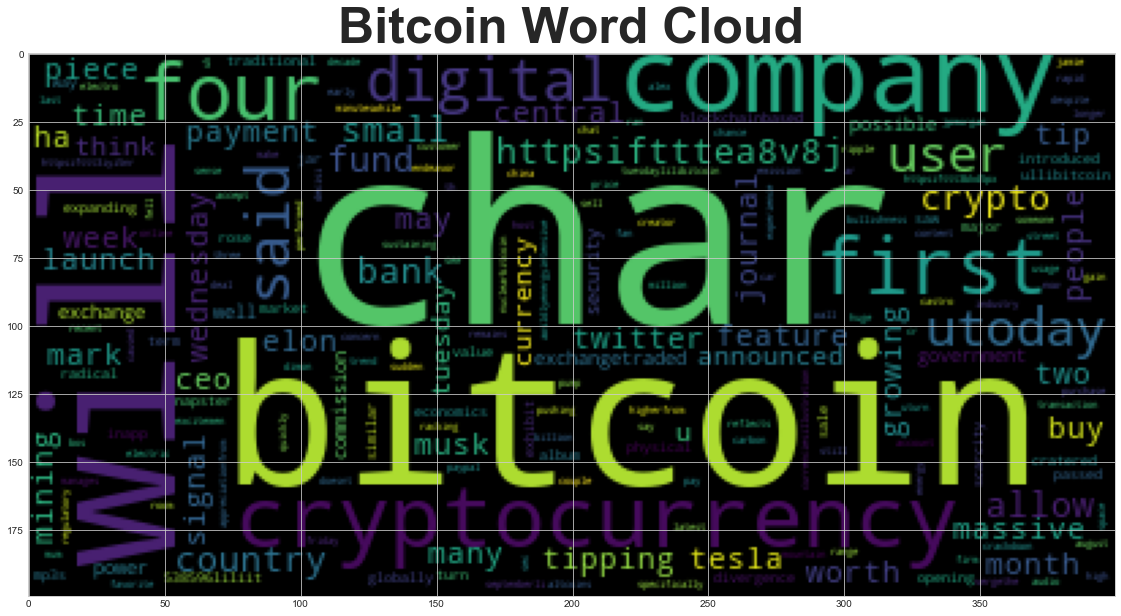

In [42]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(btc_wc)

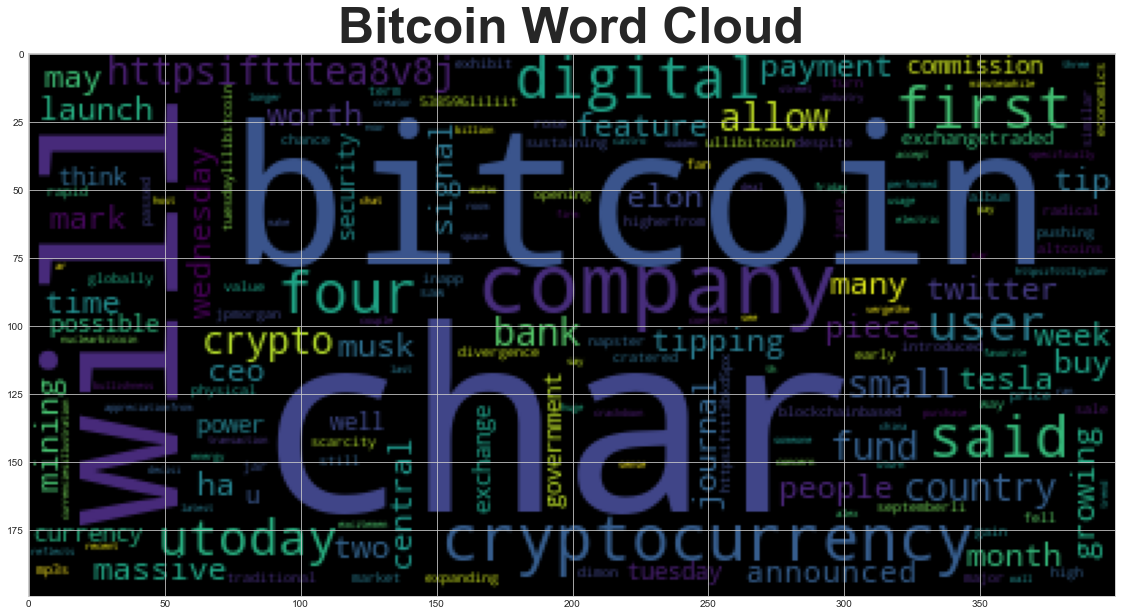

In [43]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(' '.join(btc_tokens))
plt.title("Bitcoin Word Cloud", fontsize = 50, fontweight = 'bold')
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [45]:
import spacy
from spacy import displacy

In [46]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [47]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [48]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])
btc_content

'Four months after Twitter first introduced in-app tipping, the company is expanding its tip jar feature in a major way. The company is opening up tipping to all its users globally, and for the first … [+2390 chars] Bitcoin and similar blockchain-based cryptos exhibit the same radical divergence from traditional scarcity economics that we first saw when MP3s and Napster cratered physical album sales at the turn … [+8436 chars] <ul><li>Bitcoin, in terms of market value, rose 4.6% to $53,859.6.</li><li>It passed $50,000 mark for first time in four weeks on Tuesday.\xa0</li><li>Bitcoin fell below $50,000 in early September.</li>… [+821 chars] How high are the chances of Bitcoin sustaining its gains and pushing altcoins higher?from U.Today https://ift.tt/3BkD5px https://ift.tt/eA8V8J JPMorgan CEO Jamie Dimon is still not a Bitcoin fan despite rapid price appreciationfrom U.Today https://ift.tt/3iyi5nR https://ift.tt/eA8V8J Elon Musk has performed a sudden U-turn on bitcoin over concerns ab

In [49]:
# Run the NER processor on all of the text
doc = nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "BITCOIN NER"

In [50]:
# Render the visualization
displacy.render(doc, style='ent')

In [51]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Four months DATE
4.6% PERCENT
53,859.6.</li><li MONEY
50,000 MONEY
first ORDINAL
four weeks DATE
Tuesday DATE
50,000 MONEY
JPMorgan ORG
Jamie Dimon PERSON
https://ift.tt/eA8V8J Elon Musk PERSON
Tesla PERSON
$1.6 billion MONEY
Wednesday DATE
a couple of minutes TIME
Alex Castro PERSON
The Verge
 WORK_OF_ART
The Peoples Bank of China ORG
Friday DATE
Last week DATE
the Wall Street Journal ORG
three CARDINAL
Journal ORG
Th ORG
electro GPE
two decades DATE
403 million CARDINAL
23 August DATE
UK GPE
four CARDINAL
SEC ORG
two CARDINAL
Digital ORG
IMF ORG
Kristalina Georgieva PERSON
Elon Musk PERSON
Tuesday DATE
U.S. GPE
Canada GPE
Bitcoin NORP
Alberta GPE
Link Global PERSON
19 CARDINAL
16 CARDINAL
Securities and Exchange Commission ORG
Andrew Kelly PERSON
The US Securities and Exchange Commission ORG
as many as four CARDINAL
October DATE
next month DATE
Wednesday DATE
NurPhoto ORG
Getty Images ORG
first ORDINAL
Tuesday DATE
ProShares PERSON


---

### Ethereum NER

In [52]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])
eth_content

'A new cross-chain bridge is currently connected to Ethereum through a cross-chain bridge, with Cardano and other public chains to come in the future.\r\nNervos\xa0today announced that the Force Bridge is … [+3114 chars] Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars] Mark Cuban has some advice for people who are new to investing in cryptocurrency.\r\nAs an investment, I think ethereum has the most upside, he told CNBC Make It Wednesday. Bitcoin, he added, is better… [+1139 chars] Robinhood plans to start a cryptocurrency wallet next month, the company announced on Wednesday. The tool will allow you to send and receive digital currencies, as well as trade them and move them of… [+1090 chars] image source, foundation.app/@SideEyeingChloe\r\nimage captionChloe Clem\'s disapproving look has become an internet sensation\r

In [53]:
# Run the NER processor on all of the text
doc = nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "ETHEREUM NER"

In [54]:
# Render the visualization
displacy.render(doc, style='ent')

In [ ]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

---